<a href="https://colab.research.google.com/github/RohanDubeySF/Training/blob/master/Feature-Selection/MutualInformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mutual Information
MI Estimate mutual information for a discrete target variable.

### Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

In [ ]:
import pandas as pd
import numpy as np

# Information gain for classification


In [ ]:
data=pd.read_csv('https://gist.githubusercontent.com/tijptjik/9408623/raw/b237fa5848349a14a14e5d4107dc7897c21951f5/wine.csv')
data.sample(5)

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
106,2,12.25,1.73,2.12,19.0,80,1.65,2.03,0.37,1.63,3.40,1.00,3.17,510
78,2,12.33,0.99,1.95,14.8,136,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750
44,1,13.05,1.77,2.10,17.0,107,3.00,3.00,0.28,2.03,5.04,0.88,3.35,885
42,1,13.88,1.89,2.59,15.0,101,3.25,3.56,0.17,1.70,5.43,0.88,3.56,1095
132,3,12.81,2.31,2.40,24.0,98,1.15,1.09,0.27,0.83,5.70,0.66,1.36,560


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data.drop(['Wine'],axis=1),data['Wine'],test_size=0.2,random_state=69)
x_train.sample(5)

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
161,13.69,3.26,2.54,20.0,107,1.83,0.56,0.50,0.80,5.88,0.960,1.82,680
38,13.07,1.50,2.10,15.5,98,2.40,2.64,0.28,1.37,3.70,1.180,2.69,1020
70,12.29,1.61,2.21,20.4,103,1.10,1.02,0.37,1.46,3.05,0.906,1.82,870
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.600,1.68,830
158,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.00,0.570,1.96,660


In [ ]:
from sklearn.feature_selection import mutual_info_classif
mi_class=mutual_info_classif(x_train,y_train)
mi_class

array([0.47284453, 0.26694703, 0.06179316, 0.25159474, 0.13782258,
       0.405886  , 0.64367559, 0.1777967 , 0.2662582 , 0.52396865,
       0.38076305, 0.54715819, 0.54095002])

In [ ]:
  mi_info=pd.Series(mi_class)
  mi_info.index=x_train.columns
  mi_info.sort_values()

,0
Ash,0.061793
Mg,0.137823
Nonflavanoid.phenols,0.177797
Acl,0.251595
Proanth,0.266258
Malic.acid,0.266947
Hue,0.380763
Phenols,0.405886
Alcohol,0.472845
Color.int,0.523969


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

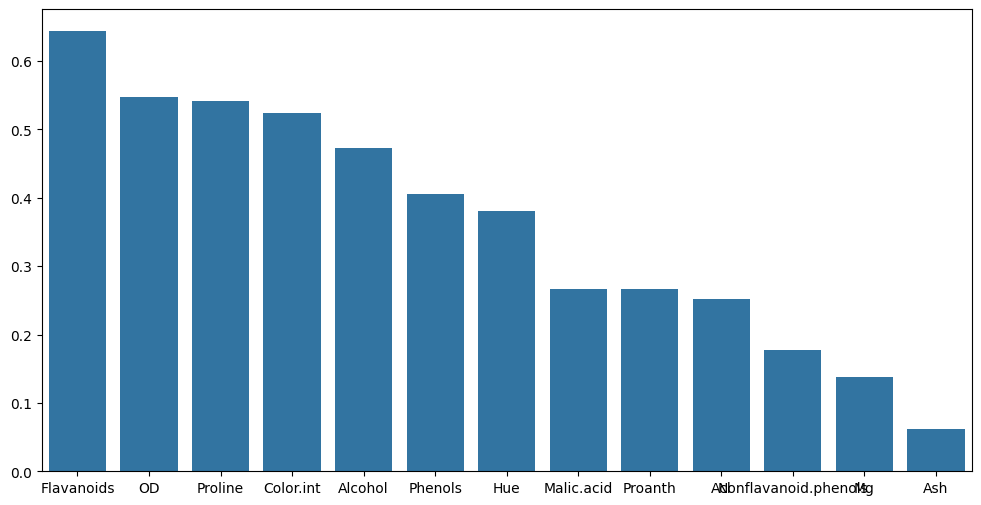

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(  mi_info.sort_values(ascending=False))


In [ ]:
from sklearn.feature_selection import SelectKBest
cols=SelectKBest(mutual_info_classif,k=5)

In [ ]:
cols.fit(x_train,y_train)

SelectKBest(k=5, score_func=<function mutual_info_classif at 0x7a45fc8fa700>)

In [ ]:
cols.get_support()

array([ True, False, False, False, False, False,  True, False, False,
        True, False,  True,  True])

In [ ]:
columns=x_train.columns[cols.get_support()]
columns

Index(['Alcohol', 'Flavanoids', 'Color.int', 'OD', 'Proline'], dtype='object')

In [ ]:
x_train_new=cols.transform(x_train)

In [ ]:
x_train_new=pd.DataFrame(x_train_new,columns=columns)
x_train_new

,Alcohol,Flavanoids,Color.int,OD,Proline
0,13.82,3.74,7.05,3.26,1190.0
1,12.77,1.25,3.40,2.12,372.0
2,12.08,1.59,1.74,3.21,625.0
3,13.49,1.84,3.74,2.78,472.0
4,12.60,1.36,2.45,2.77,562.0
...,...,...,...,...,...
137,13.94,3.54,8.90,3.10,1260.0
138,13.32,0.76,8.42,1.62,650.0
139,12.08,1.50,2.40,2.27,480.0
140,12.72,1.76,3.30,2.42,488.0


# Information Gain for Regression


In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()

In [ ]:
data=pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx')
data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data.drop(['Y house price of unit area'],axis=1),data['Y house price of unit area'],test_size=0.2,random_state=69)
x_train

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
223,224,2013.250000,9.1,1402.0160,0,24.98569,121.52760
200,201,2013.416667,17.4,995.7554,0,24.96305,121.54915
279,280,2013.416667,2.6,1554.2500,3,24.97026,121.51642
67,68,2013.500000,8.5,104.8101,5,24.96674,121.54067
136,137,2012.750000,11.4,390.5684,5,24.97937,121.54245
...,...,...,...,...,...,...,...
404,405,2013.333333,16.4,289.3248,5,24.98203,121.54348
90,91,2012.833333,0.0,274.0144,1,24.97480,121.53059
107,108,2013.333333,12.2,1360.1390,1,24.95204,121.54842
203,204,2012.666667,15.6,289.3248,5,24.98203,121.54348


In [ ]:
from sklearn.feature_selection import mutual_info_regression
mi_reg=mutual_info_regression(x_train,y_train)

In [ ]:
mi_reg


array([0.0371342 , 0.        , 0.26757462, 0.63599754, 0.35484566,
       0.5321015 , 0.65135059])

In [ ]:
mi_reg=pd.Series(mi_reg)
mi_reg.index=x_train.columns
mi_reg

,0
No,0.037134
X1 transaction date,0.000000
X2 house age,0.267575
X3 distance to the nearest MRT station,0.635998
X4 number of convenience stores,0.354846
X5 latitude,0.532101
X6 longitude,0.651351


In [ ]:
mi_reg.sort_values()

,0
X1 transaction date,0.000000
No,0.037134
X2 house age,0.267575
X4 number of convenience stores,0.354846
X5 latitude,0.532101
X3 distance to the nearest MRT station,0.635998
X6 longitude,0.651351


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'X6 longitude'),
  Text(1, 0, 'X3 distance to the nearest MRT station'),
  Text(2, 0, 'X5 latitude'),
  Text(3, 0, 'X4 number of convenience stores'),
  Text(4, 0, 'X2 house age'),
  Text(5, 0, 'No'),
  Text(6, 0, 'X1 transaction date')])

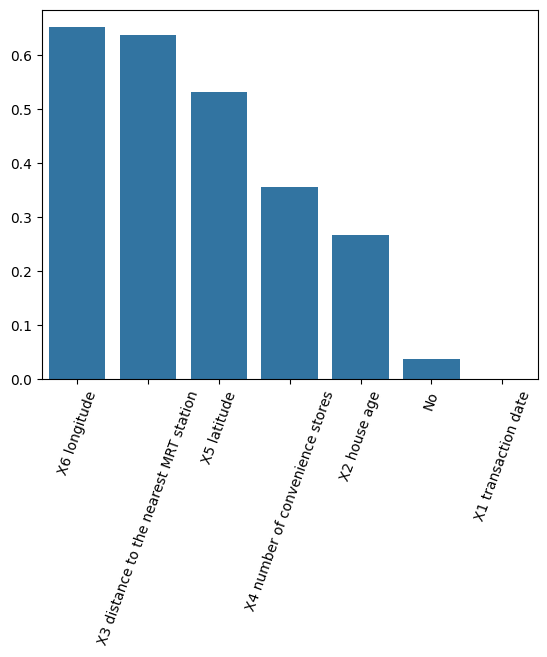

In [ ]:

sns.barplot(mi_reg.sort_values(ascending=False))
plt.xticks(rotation=70)

In [ ]:
from sklearn.feature_selection import SelectKBest
cols=SelectKBest(mutual_info_regression,k=5)
cols.fit(x_train,y_train)

SelectKBest(k=5, score_func=<function mutual_info_regression at 0x7a45fc8fa5c0>)

In [ ]:
cols.get_support()

array([False, False,  True,  True,  True,  True,  True])

In [ ]:
columns=x_train.columns[cols.get_support()]
columns

Index(['X2 house age', 'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude'],
      dtype='object')

In [ ]:
new_x_train=cols.transform(x_train)
new_x_train=pd.DataFrame(new_x_train,columns=columns)
new_x_train

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,9.1,1402.0160,0.0,24.98569,121.52760
1,17.4,995.7554,0.0,24.96305,121.54915
2,2.6,1554.2500,3.0,24.97026,121.51642
3,8.5,104.8101,5.0,24.96674,121.54067
4,11.4,390.5684,5.0,24.97937,121.54245
...,...,...,...,...,...
326,16.4,289.3248,5.0,24.98203,121.54348
327,0.0,274.0144,1.0,24.97480,121.53059
328,12.2,1360.1390,1.0,24.95204,121.54842
329,15.6,289.3248,5.0,24.98203,121.54348
